# Make more impactful charts by adding subtitles with plt.suptitle

> Blog post: https://engineeringfordatasciecne.com/posts/matplotlib_subtitles/

## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
# set matplotlib formatting (optional)
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.titlepad"] = 10

In [3]:
# !pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

## Example 1

### Dremio vs BigQuery Performance

Data collected from a benchmarking experiment using [TPC-H benchmark data](https://www.tpc.org/tpch/) and queries.

In [4]:
# define a dataset as a string
DREMIO_BQ_DATA = """
dataset_size|bigquery|dremio
1|24.891|12.720
30|63.857|71.701
100|87.463|207.316
"""

DREMIO_COLOUR = "#43b8c9"
BQ_COLOUR = "#3367d6"

<IPython.core.display.Javascript object>

In [5]:
from io import StringIO

# read data string into Pandas Dataframe
data = pd.read_csv(StringIO(DREMIO_BQ_DATA), delimiter="|")
data

,dataset_size,bigquery,dremio
0,1,24.891,12.720
1,30,63.857,71.701
2,100,87.463,207.316


<IPython.core.display.Javascript object>

### Default Plot

Plotting the data and just adding a title.

We will also rename the x and y axis for clarity.

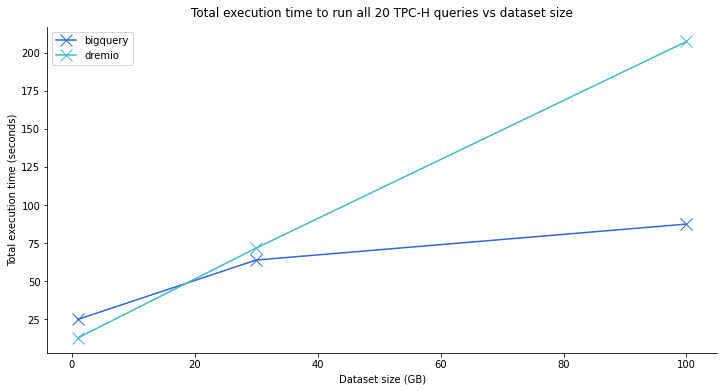

<IPython.core.display.Javascript object>

In [6]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title("Total execution time to run all 20 TPC-H queries vs dataset size")

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)")
plt.xlabel("Dataset size (GB)")
plt.show()

The chart is 'functional'. But it takes the reader a while to understand the graph and interpret the results.

We can greatly aid the reader by adding a headline to the chart.

**Improved plot using plt.suptitle to add a headline**

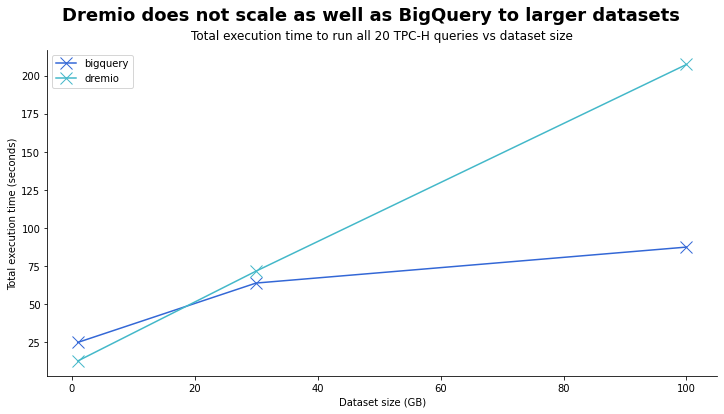

<IPython.core.display.Javascript object>

In [7]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title("Total execution time to run all 20 TPC-H queries vs dataset size")

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)")
plt.xlabel("Dataset size (GB)")

# add a headline with key takeaway message
# increase font weight and size to differentiate it
plt.suptitle(
    "Dremio does not scale as well as BigQuery to larger datasets",
    fontweight="bold",
    fontsize=18,
)


plt.show()

The key take away from the graph is that Dremio does not scale as well as BigQuery to larger datasets (e.g. 100GB).

Note that the take home message might be different depending on the stakeholder.

For example, for a different stakeholder or use case, you might want to go the other way and use the headline:
> "Dremio outperforms BigQuery on small datasets"

This might be an important outcome if you are trying to serve a BI dashboard on small data which requires fast response times.

Make sure you tailor your message for the right audience and for the point you wish to convey. Sometimes there might be more than one way to interpret the data or more than one message.

**Final touches: improve other chart formatting**

The chart above is an improvement on the original. However, we can use a few other tricks to clean up the graphic and remove unnecessary information which clutters the chart.

For example, the plot borders and axis tick values.

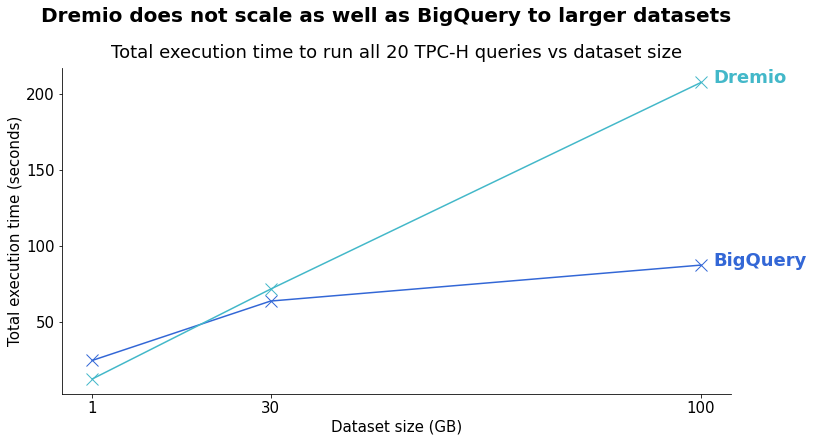

<IPython.core.display.Javascript object>

In [8]:
data.plot(
    x="dataset_size",
    color=[BQ_COLOUR, DREMIO_COLOUR],
    marker="x",
    figsize=(12, 6),
    markersize=12,
    legend=True,
)

# add functional title that describes what is being plotted
plt.title(
    "Total execution time to run all 20 TPC-H queries vs dataset size",
    fontsize=18,
    pad=10,
)

# add labels to the chart axis
plt.ylabel("Total execution time (seconds)", fontsize=15)
plt.xlabel("Dataset size (GB)", fontsize=15)

# add a headline with key takeaway message
# increase font weight and size to differentiate it
plt.suptitle(
    "Dremio does not scale as well as BigQuery to larger datasets",
    fontweight="bold",
    fontsize=20,
    y=1.02,
)

# minimise unecessary axis labels
plt.xticks([1, 30, 100], size=15)
plt.yticks([50, 100, 150, 200], size=15)


# explicitly annotate the graph lines with text
# instead of using a small legend in the top corner
plt.text(
    x=102,
    y=207,
    s="Dremio",
    fontdict={"color": DREMIO_COLOUR, "size": 18, "weight": "bold"},
)

plt.text(
    x=102,
    y=87,
    s="BigQuery",
    fontdict={"color": BQ_COLOUR, "size": 18, "weight": "bold"},
)
plt.legend("", frameon=False)


# remove unnecessary plot box lines
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.show()

# Tips for working with plt.suptitle


**Placement**

Working with plt.suptitle can be a little frustrating, particularly when it comes to getting the placement correct.

Sometimes, like in the example above, the default position is fine. However, other times it can overlap with other components of the graph.

You can change the position of the suptitle by using the `x` and `y` arguments. Normally it takes some trial and error to get it right.

**Formatting**

It is useful to change the formatting of the the headline to clearly differentiate it from the normal title and other graph components.

You can use the `fontsize` and `fontweight` arguments with `plt.suptitle` to emphasise the headline.

We will demonstrate these in the next example

## Example 2: Stock Prices

**Highlighting the poor performance of Netflix and Spotify stocks in the last year**

In [9]:
# !pip install ffn
import ffn

<IPython.core.display.Javascript object>

/var/folders/1w/vfx1b5rs6_94c3jch9lbm4h40000gn/T/ipykernel_49817/3015973491.py:22: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


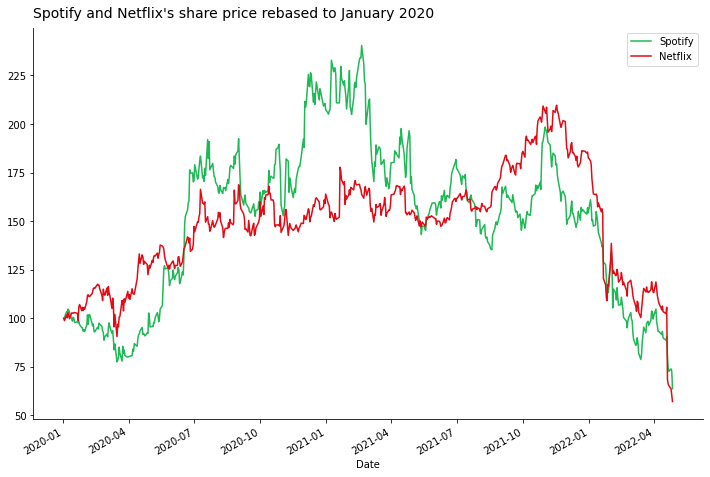

<IPython.core.display.Javascript object>

In [10]:
# load daily stock prices from yahoo for Spotify and Netflix
tickers = ["SPOT", "NFLX"]
prices = ffn.get(tickers, start="2020-01-01", end="2022-04-28")

# rename the columns to their more common names
prices.columns = ["Spotify", "Netflix"]

# rebase prices so they are indexed to 100 from 1st January
rebased = prices.rebase()

SPOTIFY_GREEN = "#1DB954"
NETFLIX_RED = "#e50914"

# plot
rebased.plot(figsize=(12, 8), color=[SPOTIFY_GREEN, NETFLIX_RED])
plt.title(
    "Spotify and Netflix's share price rebased to January 2020",
    fontsize=14,
    pad=10,
    loc="left",
)
plt.show()

We have created a chart showing the relative performance of Spotify and Netflix since before the pandemic in 2020. We have a descriptive title telling us what the chart is showing, but the take home message is not clear.

Let's improve this with by adding `plt.suptitle`

**Add a chart headline with plt.suptitle and align to the left**

We will add the headline and use the `x` and `y` arguments to align it to the left and above the main title.

/var/folders/1w/vfx1b5rs6_94c3jch9lbm4h40000gn/T/ipykernel_49817/3399915206.py:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


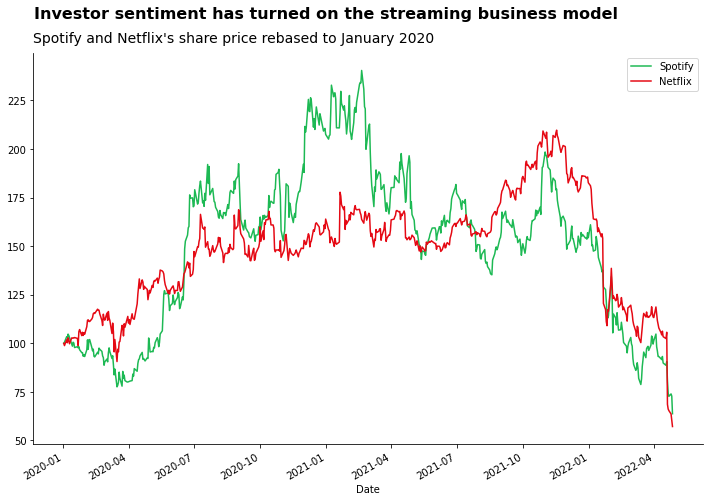

<IPython.core.display.Javascript object>

In [11]:
rebased.plot(figsize=(12, 8), color=[SPOTIFY_GREEN, NETFLIX_RED])
plt.title(
    "Spotify and Netflix's share price rebased to January 2020",
    fontsize=14,
    pad=10,
    loc="left",
)
plt.suptitle(
    "Investor sentiment has turned on the streaming business model",
    fontsize=16,
    fontweight="bold",
    x=0.126,
    y=0.96,
    ha="left",
)
plt.show()

**Final Touches**

The above demonstrates how to add a headline.

For completeness, here is how we might further customise the graph to remove some unnecessary clutter and make the graph more readable.

In [ ]:
import matplotlib.dates as mdates

/var/folders/1w/vfx1b5rs6_94c3jch9lbm4h40000gn/T/ipykernel_49817/135108387.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


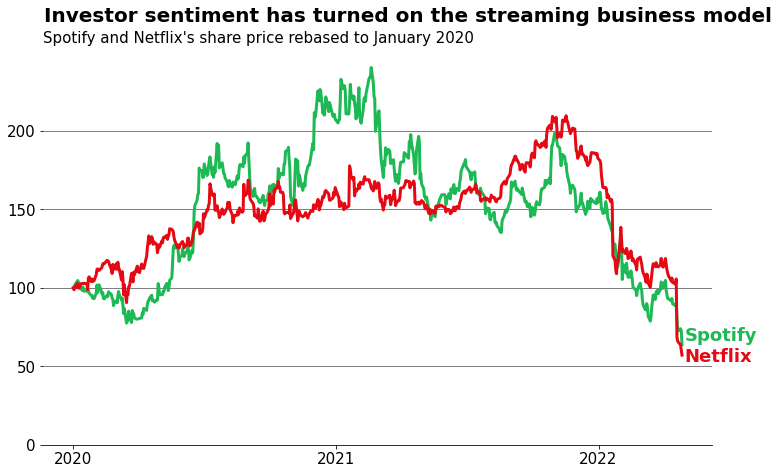

<IPython.core.display.Javascript object>

In [12]:
rebased.plot(
    figsize=(12, 8), color=[SPOTIFY_GREEN, NETFLIX_RED], linewidth=3, legend=False
)
plt.title(
    "Spotify and Netflix's share price rebased to January 2020",
    fontsize=15,
    loc="left",
)
plt.suptitle(
    "Investor sentiment has turned on the streaming business model",
    fontsize=20,
    fontweight="bold",
    x=0.126,
    ha="left",
    y=0.96,
)


# explicitly annotate the graph lines with text
# instead of using a small legend in the top corner
plt.text(
    x="2022-05-01",
    y=66,
    s="Spotify",
    fontdict={"color": SPOTIFY_GREEN, "size": 18, "weight": "bold"},
)

plt.text(
    x="2022-05-01",
    y=53,
    s="Netflix",
    fontdict={"color": NETFLIX_RED, "size": 18, "weight": "bold"},
)

# format y axis
plt.yticks([0, 50, 100, 150, 200], size=15)

# format x axis
plt.xticks(["2020-01-01", "2021-01-01", "2022-01-01"], ha="center", size=15)
myFmt = mdates.DateFormatter("%Y")
plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().xaxis.set_tick_params(rotation=0)
plt.xlabel("")

# add gridlines
plt.grid(color="grey", axis="y", linestyle="-", linewidth=1)

# remove unecessary yaxis border
plt.gca().spines["left"].set_visible(False)
plt.show()